In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
from caffe_classes import class_names

Была взята готовая НС архетектуры SSD

- deploy.prototxt — файл описывающий слои нашей нейронной сети.
- caffemodel — веса, вычисленные во время тренировки модели.

In [2]:
protoFile = "deploy.prototxt.txt"
weightsFile = "bvlc_alexnet.caffemodel"

Загрузка модели

In [3]:
model = cv2.dnn.readNetFromCaffe(protoFile, weightsFile)

imread сразу преобразует исходную картинку в массив Numpy

In [4]:
image = cv2.imread("photo.jpg")

# Изменяем входное изображение
- Приводим к размеру, по которому обучалась НС (300х300)
- Делаем среднее вычитание, (104.0, 177.0, 123.0) это среднее значение RGB из набора данных. Ниже приведенно измененное изображение. 
Насколько я понял, это нужно для того, чтобы уровнять освященность изображенний из набора данных, дабы освещенность изображения не влияла на работу НС. 

In [5]:
height, width = image.shape[:2]
blob = cv2.dnn.blobFromImage(image, 1.0, (227, 227), [104., 117., 124.])
blob_print = blob

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(3, 227, 227)
(227, 227, 3)


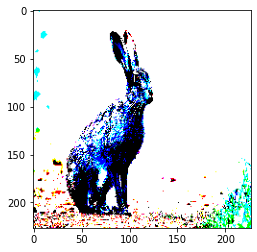

In [6]:
blob_print = blob_print[0]
print(blob_print.shape)
blob_print = np.swapaxes(blob_print, 0, 2)
blob_print = np.swapaxes(blob_print, 0, 1)
print(blob_print.shape)
plt.imshow(blob_print)
plt.show()

In [7]:
# Подаем на вход НС
model.setInput(blob)
# Выход НС
output = model.forward()

max = np.amax(output)
max_index =  output.argmax()
class_name = class_names[np.argmax(output)]    

(-0.5, 1599.5, 1066.5, -0.5)

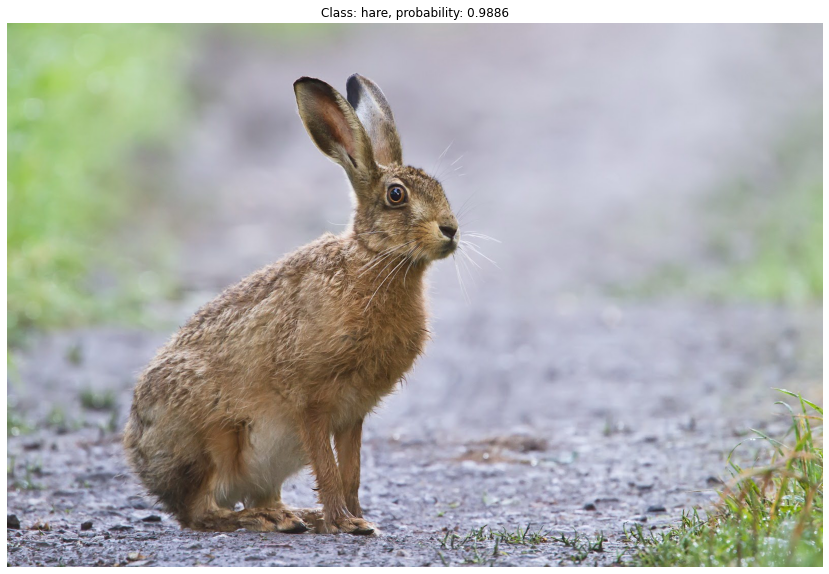

In [8]:
fig2 = plt.figure(figsize=(20,10))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title("Class: " + class_name + ", probability: %.4f" %max)
plt.axis('off')